## Importing Libraries and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("F:/Data_Science/Jupyter Content/IITG Content/Ecommerce Customers.csv")

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [71]:
df.shape

(500, 8)

In [117]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [13]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

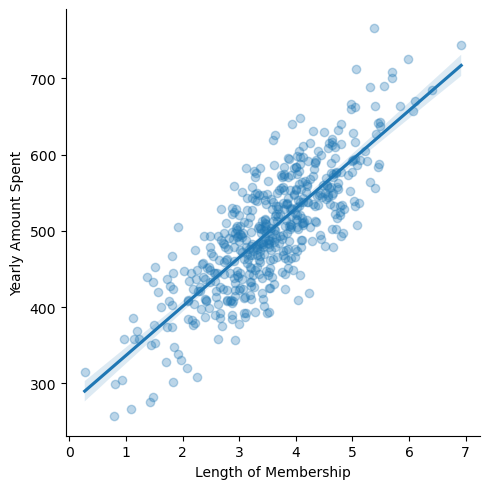

In [179]:
sns.lmplot(x="Length of Membership",
           y="Yearly Amount Spent",
           data=df,
           scatter_kws={'alpha': 0.3}
          )

## Creating Train test Split

In [75]:
x = df.drop(['Email','Address','Avatar','Yearly Amount Spent'], axis=1)
y = df['Yearly Amount Spent'] 

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

## Creating linear regression model

In [137]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [142]:
lin_reg.coef_

array([25.68601975, 38.71837673,  0.45413232, 61.41152176])

In [144]:
lin_reg.intercept_

-1050.3415975469516

## Linear regression equation will be:
## 25.686 *x1 + 38.7184*x2 + 0.4541*x3 + 61.4115*x4 - 1050.3416

In [150]:
predict = lin_reg.predict(x_test)

Text(0.5, 0, 'Predictions')

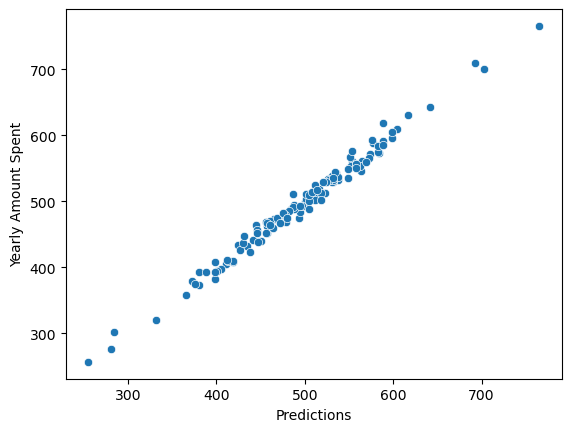

In [159]:
sns.scatterplot(x = predict,y= y_test)
plt.xlabel("Predictions")

In [181]:
lin_reg.score(x_test,y_test)

0.9869540969227469

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math

In [191]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predict))
print('Mean Squared Error: ', mean_squared_error(y_test, predict))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, predict)))


Mean Absolute Error:  7.166837137293106
Mean Squared Error:  82.92506172190751
RMSE:  9.106319878079592


## Residuals

In [196]:
residuals = y_test - predict

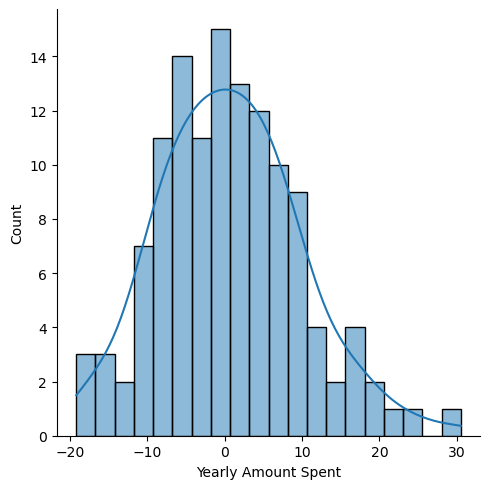

In [206]:
sns.displot(residuals, bins=20, kde=True)

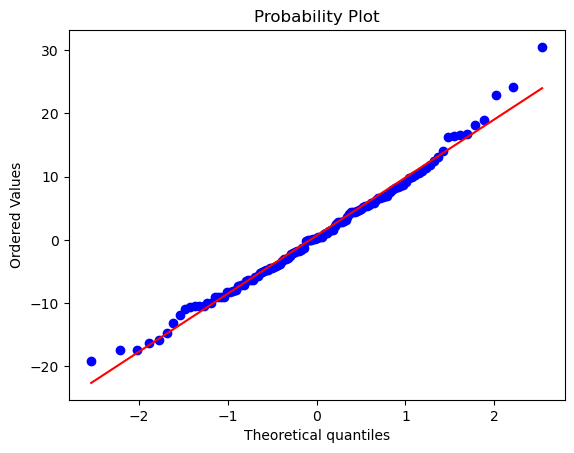

In [208]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()